# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


## 1. Perkenalan Dataset

Pada proyek ini, saya menggunakan **Titanic - Machine Learning from Disaster Dataset** yang berasal dari platform **Kaggle**. Dataset ini merupakan dataset klasik yang digunakan untuk memprediksi kemungkinan penumpang selamat atau tidak pada tragedi tenggelamnya kapal Titanic.

### 1. Sumber Dataset
Dataset diperoleh dari kompetisi resmi Kaggle:
https://www.kaggle.com/competitions/titanic

Dataset terdiri dari dua bagian:
- **train.csv** → digunakan untuk eksplorasi, EDA, dan preprocessing pada tahap eksperimen.  
- **test.csv** → berisi data tanpa label, akan digunakan pada tahap inferensi (bukan bagian dari Kriteria 1).

### 2. Deskripsi Dataset
Dataset Titanic berisi informasi demografis dan detail perjalanan penumpang, dengan tujuan memprediksi variabel **Survived** (0 = Tidak Selamat, 1 = Selamat).

Berikut adalah data dictionary resmi dari Kaggle:

| Variabel | Deskripsi | Keterangan |
|---------|-----------|------------|
| survival | Status keselamatan | 0 = Tidak Selamat, 1 = Selamat |
| pclass | Kelas tiket | 1 = First Class, 2 = Second Class, 3 = Third Class |
| sex | Jenis kelamin | — |
| age | Usia penumpang | Dalam tahun, bisa bernilai desimal |
| sibsp | Jumlah saudara / pasangan di kapal | — |
| parch | Jumlah orang tua / anak di kapal | — |
| ticket | Nomor tiket | — |
| fare | Harga tiket | — |
| cabin | Nomor kabin | Banyak nilai kosong |
| embarked | Pelabuhan keberangkatan | C = Cherbourg, Q = Queenstown, S = Southampton |

### 3. Alasan Pemilihan Dataset
Saya memilih dataset Titanic karena:
- Memiliki **beragam tipe data** (numerik, kategorikal, string, banyak missing value).
- Sangat cocok untuk mempelajari **preprocessing modern** seperti encoding, scaling, imputasi, dan feature engineering.
- Sesuai untuk **automated preprocessing** dan **workflow** seperti yang diminta pada Kriteria 1 hingga Advance.
- Merupakan dataset populer untuk evaluasi model klasifikasi.

Dataset siap digunakan untuk proses EDA dan preprocessing pada tahap selanjutnya.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
# Library umum
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk mempercantik visual di notebook
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Preprocessing & Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mengatasi missing value
from sklearn.impute import SimpleImputer

# Deteksi outlier (opsional)
from scipy import stats

# Warning filter biar output bersih
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_path = "/content/drive/MyDrive/titanic/train.csv"

In [6]:
import pandas as pd
df = pd.read_csv(data_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [10]:
#
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


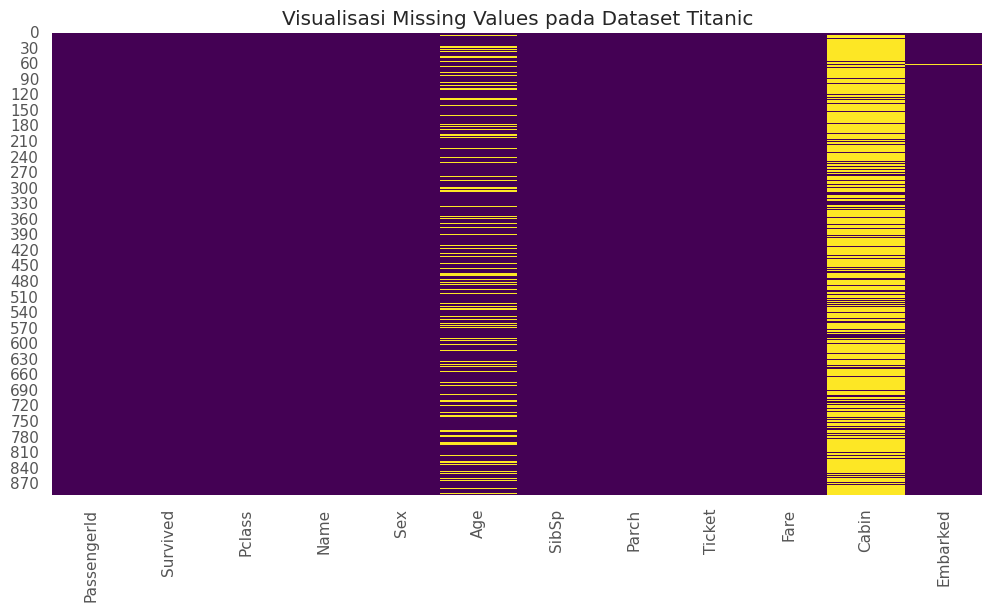

In [11]:
# Heatmap Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values pada Dataset Titanic")
plt.show()

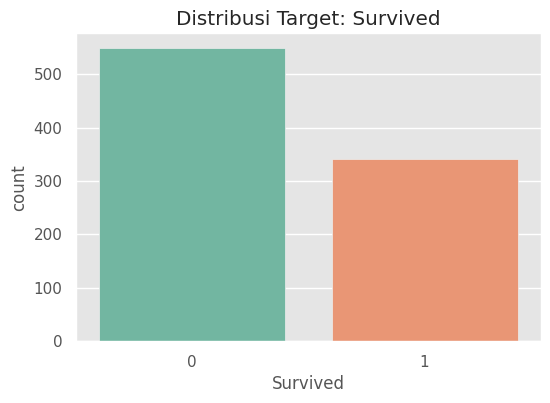

,count
Survived,
0,549
1,342


In [12]:
# Distribusi Survived (Target)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title("Distribusi Target: Survived")
plt.show()

df['Survived'].value_counts()

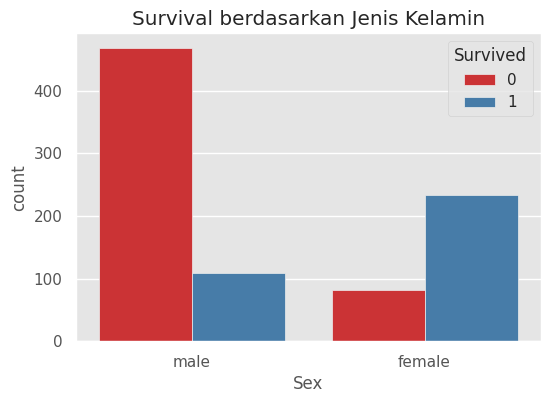

In [13]:
# Distribusi Jenis Kelamin vs Survival
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title("Survival berdasarkan Jenis Kelamin")
plt.show()

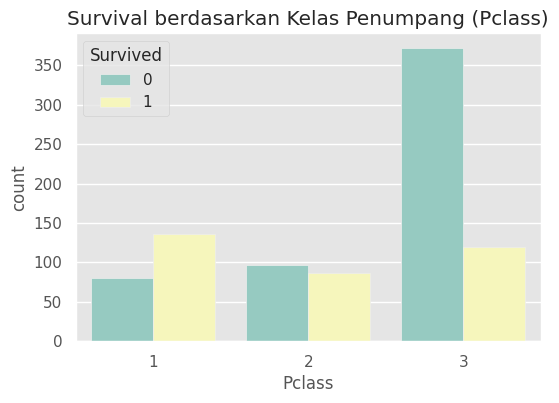

In [14]:
# Distribusi Pclass vs Survival
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set3')
plt.title("Survival berdasarkan Kelas Penumpang (Pclass)")
plt.show()

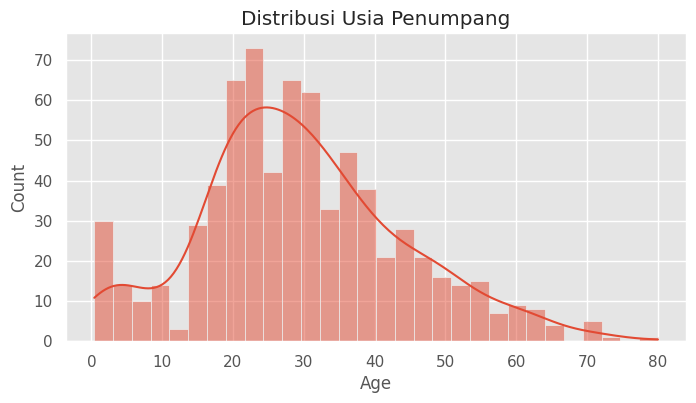

In [15]:
# Distribusi Age
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribusi Usia Penumpang")
plt.show()

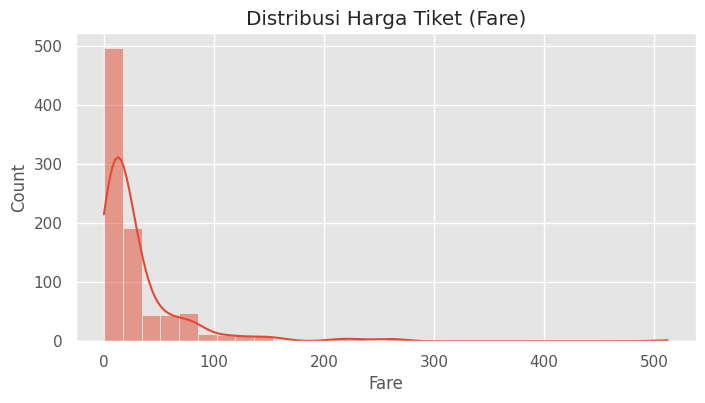

In [16]:
# Distribusi Fare
plt.figure(figsize=(8,4))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title("Distribusi Harga Tiket (Fare)")
plt.show()

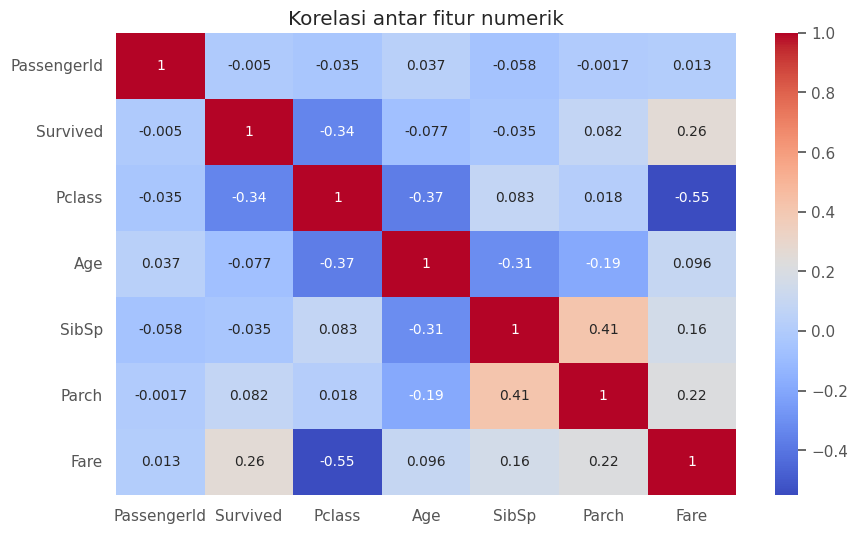

In [17]:
# Heatmap Korelasi Numerik
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar fitur numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
# Menghapus Duplikat
# Mengecek jumlah duplikat
df.duplicated().sum()

# Menghapus duplikat jika ada
df = df.drop_duplicates()

df.shape

(891, 12)

In [19]:
# Menangani Missing Values
# Drop kolom dengan missing terlalu besar
df = df.drop(columns=['Cabin'])

# Imputasi Age dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Imputasi Embarked dengan modus
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
# Menentukan Target & Fitur
# Memisahkan fitur dan target
X = df.drop(columns=['Survived'])
y = df['Survived']

X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# Memisahkan fitur numerik & kategorikal
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked', 'Pclass']

In [22]:
X = X.drop(columns=['Name', 'Ticket'])

In [23]:
# Membuat Transformer (Imputer + Encoder + Scaler)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Transformer numerik: imputer median + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformer kategorikal: imputer modus + encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan kedua transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [24]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((712, 8), (179, 8))

In [25]:
# Fit Transform Data
# Fit pada train
X_train_processed = preprocessor.fit_transform(X_train)

# Transform test
X_test_processed = preprocessor.transform(X_test)

X_train_processed[:5]

array([[ 1.25364106, -0.07868358, -0.47072241, -0.47934164,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ],
       [-0.47728355, -0.37714494, -0.47072241, -0.47934164,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.21508629, -0.47486697, -0.47072241, -0.47934164,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ],
       [-0.24649361, -0.47623026,  0.37992316, -0.47934164,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ],
       [-1.78509326, -0.02524937,  2.93185988,  2.04874166,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ]])

In [26]:
# Menyimpan Dataset Preprocessing (untuk Skilled)
import numpy as np
import pandas as pd

# Convert ke DataFrame agar rapi
X_train_df = pd.DataFrame(X_train_processed)
X_test_df = pd.DataFrame(X_test_processed)

# Simpan ke folder preprocessing (buat foldernya dulu)
X_train_df.to_csv("X_train_processed.csv", index=False)
X_test_df.to_csv("X_test_processed.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)